[*********************100%%**********************]  3 of 3 completed
                    47
Returns       0.219439
Volatility    0.226646
Sharpe Ratio  0.968201
KO Weight     0.059567
PG Weight     0.419870
MSFT Weight   0.520563
                    45
Returns       0.127704
Volatility    0.192723
Sharpe Ratio  0.662631
KO Weight     0.463006
PG Weight     0.473843
MSFT Weight   0.063151


/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_80841/3333702212.py:80: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


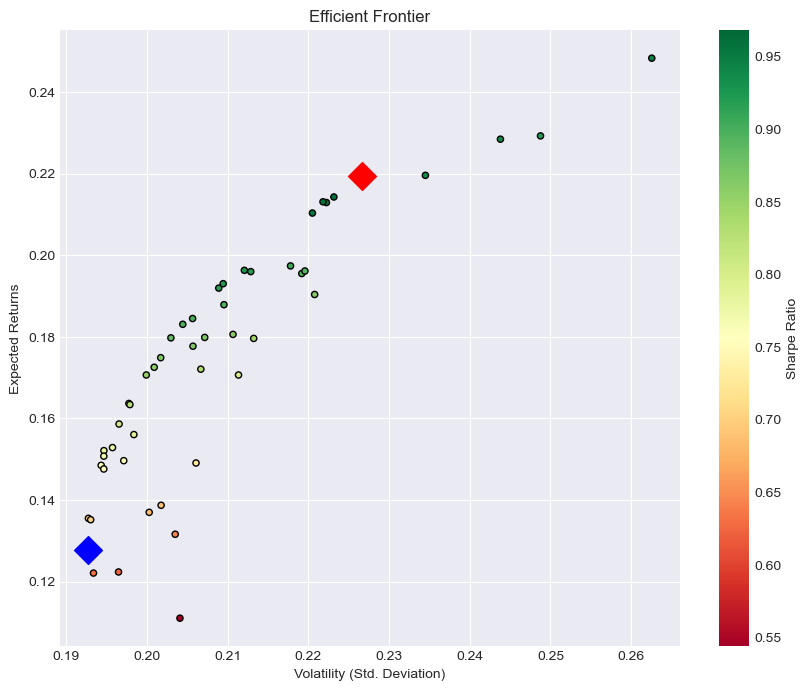

In [18]:
# import needed modules
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
start = datetime.date(2019,1,1)
end = datetime.date.today()


# get prices data
selected = ['KO', 'PG', 'MSFT']
data = yf.download(selected, start=start, end=end)["Adj Close"]
data = data.reindex(columns=selected)

# calculate daily and annual returns of the stocks
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
   weights = np.random.random(num_assets)
   weights /= np.sum(weights)
   returns = np.dot(weights, returns_annual)
   volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
   sharpe = returns / volatility
   sharpe_ratio.append(sharpe)
   port_returns.append(returns)
   port_volatility.append(volatility)
   stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
            'Volatility': port_volatility,
            'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
   portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# find min Volatility & max sharpe values in the dataframe (df)
max_sharpe = df['Sharpe Ratio'].max()
min_volatility = df['Volatility'].min()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# print the details of the 2 special portfolios
print(sharpe_portfolio.T)
print(min_variance_port.T)

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
               cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [9]:
data

KO          PG        MSFT
Date                                         
2019-01-02  40.467049   80.935875   96.218147
2019-01-03  40.216991   80.368393   92.678497
2019-01-04  41.018902   82.008759   96.988899
2019-01-07  40.484295   81.680672   97.112587
2019-01-08  40.941307   81.982147   97.816719
...               ...         ...         ...
2023-09-26  56.529999  149.320007  312.140015
2023-09-27  55.950001  147.339996  312.790009
2023-09-28  55.810001  146.339996  313.640015
2023-09-29  55.980000  145.860001  315.750000
2023-10-02  55.480000  145.190002  321.799988

[1196 rows x 3 columns]

In [24]:
df = pd.read_csv("./topix100_monthly_data.csv")
df

Date  1925.T  1928.T   2413.T  2502.T  2503.T  2802.T  2914.T  \
0    2013-11-01  1990.0  1413.0   668.25  2804.0  1578.0  1460.0  3460.0   
1    2013-12-01  2035.0  1470.0   658.75  2964.0  1513.0  1522.0  3420.0   
2    2014-01-01  1964.0  1434.0   756.25  2813.0  1406.0  1454.0  3197.0   
3    2014-02-01  1846.0  1274.0   846.25  2852.0  1385.0  1577.0  3232.0   
4    2014-03-01  1751.0  1281.0   847.00  2889.0  1430.0  1475.0  3240.0   
..          ...     ...     ...      ...     ...     ...     ...     ...   
115  2023-06-01  3792.0  2905.5  3109.00  5574.0  2101.5  5724.0  3153.0   
116  2023-07-01  3862.0  2899.0  3263.00  5595.0  2102.5  5537.0  3153.0   
117  2023-08-01  4048.0  2970.5  2903.50  5676.0  2046.0  6173.0  3191.0   
118  2023-09-01  4015.0  2977.0  2716.00  5590.0  2093.0  5764.0  3440.0   
119  2023-10-01  4015.0  2842.0  2663.00  5492.0  2092.5  5918.0  3307.0   

     3382.T      3402.T  ...  9202.T      9432.T       9433.T  9434.T  \
0    3770.0  724.000000  ...  2070.0   51.400002  2143.333252     NaN   
1    4180.0  728.000000  ...  2100.0   56.599998  2156.666748     NaN   
2    4102.0  677.000000  ...  2180.0   55.610001  1901.666626     NaN   
3    3813.0  701.000000  ...  2270.0   57.009998  2067.000000     NaN   
4    3944.0  682.000000  ...  2230.0   56.189999  1992.000000     NaN   
..      ...         ...  ...     ...         ...          ...     ...   
115  6205.0  800.400024  ...  3426.0  170.500000  4450.000000  1540.0   
116  5893.0  795.200012  ...  3406.0  162.899994  4187.000000  1578.0   
117  5981.0  786.099976  ...  3290.0  168.300003  4325.000000  1670.0   
118  5855.0  778.000000  ...  3133.0  176.600006  4577.000000  1690.5   
119  5793.0  736.200012  ...  3086.0  174.500000  4513.000000  1681.0   

      9735.T   9843.T        9983.T  9984.T   TOPIX100.T  1475.T  
0     6320.0   4745.0  12933.333008  4145.0          NaN     NaN  
1     6340.0   4985.0  14466.666992  4600.0          NaN     NaN  
2     5830.0   4985.0  12703.333008  3781.5          NaN     NaN  
3     5737.0   4600.0  11683.333008  3834.0          NaN     NaN  
4     5946.0   4475.0  12478.333008  3900.0          NaN     NaN  
..       ...      ...           ...     ...          ...     ...  
115   9739.0  16105.0  36720.000000  6773.0  1539.900024  2389.0  
116   9533.0  17455.0  35560.000000  7242.0  1553.890015  2401.0  
117  10195.0  16620.0  33480.000000  6545.0  1550.140015  2384.0  
118  10140.0  16710.0  32590.000000  6335.0  1550.079956  2401.0  
119  10115.0  15520.0  31490.000000  6044.0  1482.430054  2342.0  

[120 rows x 103 columns]

                     4965
Returns          0.160347
Volatility       0.207832
Sharpe Ratio     0.733031
TOYOTA Weight    0.255303
NINTENDO Weight  0.372175
SHISEIDO Weight  0.372522
                     2977
Returns          0.119014
Volatility       0.177732
Sharpe Ratio     0.624612
TOYOTA Weight    0.628753
NINTENDO Weight  0.065776
SHISEIDO Weight  0.305471


/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_80841/2259817335.py:67: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


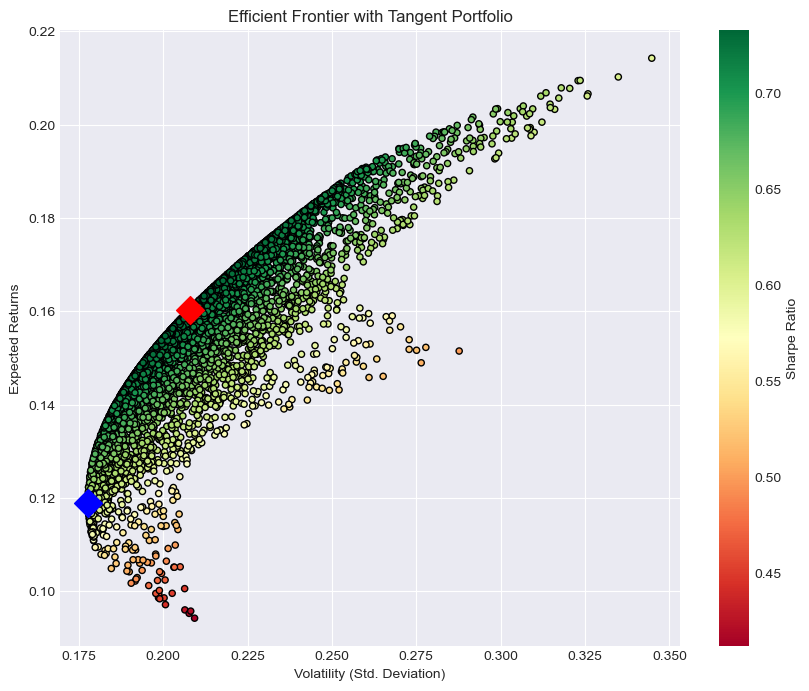

In [28]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./topix100_monthly_data.csv")

# get prices data
data = df[['7203.T', '7974.T', '4911.T']]
selected = ['TOYOTA', 'NINTENDO', 'SHISEIDO']

# calculate daily and annual returns of the stocks
returns_monthly = data.pct_change()
returns_annual = returns_monthly.mean() * 12

# get daily and covariance of returns of the stock
cov_monthly = returns_monthly.cov()
cov_annual = cov_monthly * 12

# 日本国債のリスクフリーレート
rf_rate = 0.008

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 5000

np.random.seed(101)

for single_portfolio in range(num_portfolios):
   weights = np.random.random(num_assets)
   weights /= np.sum(weights)
   returns = np.dot(weights, returns_annual)
   volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
   sharpe = (returns - rf_rate) / volatility  # シャープレシオの計算を修正
   sharpe_ratio.append(sharpe)
   port_returns.append(returns)
   port_volatility.append(volatility)
   stock_weights.append(weights)

portfolio = {'Returns': port_returns,
            'Volatility': port_volatility,
            'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(selected):
   portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

df = pd.DataFrame(portfolio)
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]
df = df[column_order]

# 最大シャープレシオを持つポートフォリオを探す
max_sharpe = df['Sharpe Ratio'].max()
min_volatility = df['Volatility'].min()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

print(sharpe_portfolio.T)
print(min_variance_port.T)

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
               cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier with Tangent Portfolio')
plt.show()



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

df = pd.read_csv("./topix100_monthly_data.csv")

# ティッカーリスト
tickers = [
    "1925", "1928", "2413", "2502", "2503", "2802", "2914", "3382", "3402", "3407", "4063", "4188", "4452", "4502", "4503", "4507", "4519", "4523", "4528", "4543", "4568", "4578", "4661", "4689", "4901", "4911", "5020", "5108", "5401", "5713", "5802", "6098", "6178", "6273", "6301", "6326", "6367", "6501", "6502", "6503", "6586", "6594", "6645", "6702", "6752", "6758", "6861", "6869", "6902", "6920", "6954", "6971", "6981", "7011", "7201", "7203", "7267", "7269", "7270", "7309", "7733", "7741", "7751", "7832", "7974", "8001", "8002", "8031", "8035", "8053", "8058", "8113", "8267", "8306", "8308", "8309", "8316", "8411", "8591", "8604", "8630", "8697", "8725", "8750", "8766", "8801", "8802", "8830", "9020", "9021", "9022", "9101", "9202", "9432", "9433", "9434", "9735", "9843", "9983", "9984", "TOPIX100", '1475'
]
tickers = [tickers + '.T' for tickers in tickers]

# 最もリターンが高い組み合わせを保存する変数
best_combination = None
best_return = -np.inf
best_volatility = np.inf

# 全ての2つの銘柄の組み合わせを取得
combinations = list(itertools.combinations(tickers, 2))

for combo in combinations:
    # 2つの銘柄のデータを取得
    data = df[list(combo)]
    
    # 月次リターンの計算
    returns_monthly = data.pct_change()
    returns_annual = returns_monthly.mean() * 12

    # リターンの共分散の計算
    cov_monthly = returns_monthly.cov()
    cov_annual = cov_monthly * 12
    
    # ポートフォリオの重みは均等にする
    weights = [0.5, 0.5]
    
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights, np.dot(cov_annual, weights)))
    
    if returns > best_return:
        best_return = returns
        best_volatility = volatility
        best_combination = combo

print("Best return combination name:", best_combination)
print("best return:", best_return)
print("best return combination's volatility:", best_volatility)


Best return combination name: ('4568.T', '6920.T')
best return: 0.41277911535974543
best return combination's volatility: 0.32936188544885947


/Users/klynoaguilar/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12388 (\N{HIRAGANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/klynoaguilar/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/klynoaguilar/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37528 (\N{CJK UNIFIED IDEOGRAPH-9298}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/klynoaguilar/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26564 (\N{CJK UNIFIED IDEOGRAPH-67C4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/klynoaguilar/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from cu

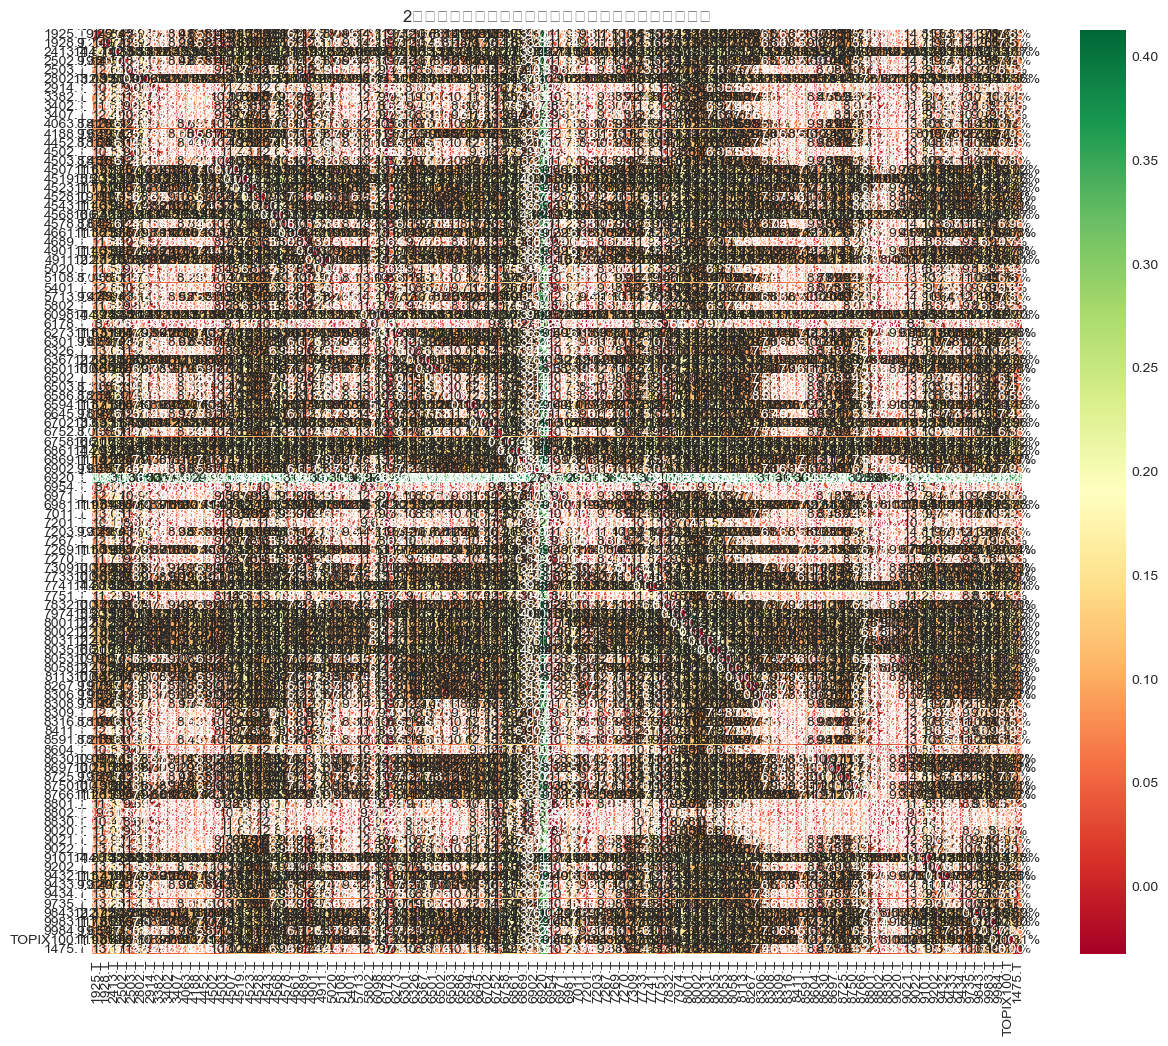

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns


# 銘柄の組み合わせの期待リターンを格納するマトリックス
return_matrix = np.zeros((len(tickers), len(tickers)))

# 全ての2つの銘柄の組み合わせを取得
combinations = list(itertools.combinations(range(len(tickers)), 2))

for combo in combinations:
    i, j = combo
    # 2つの銘柄のデータを取得
    data = df[[tickers[i], tickers[j]]]
    
    # 月次リターンの計算
    returns_monthly = data.pct_change()
    returns_annual = returns_monthly.mean() * 12
    
    # ポートフォリオの重みは均等にする
    weights = [0.5, 0.5]
    
    returns = np.dot(weights, returns_annual)
    return_matrix[i, j] = returns
    return_matrix[j, i] = returns  # 対称性を保つため

# ヒートマップの描画
plt.figure(figsize=(15, 12))
sns.heatmap(return_matrix, annot=True, fmt=".2%", cmap='RdYlGn', xticklabels=tickers, yticklabels=tickers)
plt.title("2つの銘柄の組み合わせの期待リターンのヒートマップ")
plt.show()

In [34]:
# 建設・不動産
construction_real_estate = ['1925.T', '1928.T', '8801.T', '8802.T', '8830.T']

# 情報技術・通信
it_communication = ['2413.T', '4689.T', '6702.T', '6752.T', '6758.T', '6861.T', '6645.T', '7974.T', '9432.T', '9433.T', '9434.T', '9984.T']

# 食品・飲料
food_beverage = ['2502.T', '2503.T', '2802.T']

# 化学・素材
chemical_materials = ['2914.T', '3402.T', '3407.T', '4063.T', '4188.T', '4452.T', '5020.T']

# 製薬・バイオ
pharma_bio = ['4502.T', '4503.T', '4507.T', '4519.T', '4523.T', '4528.T', '4543.T', '4568.T', '4578.T']

# 産業機械・設備
industrial_machinery = ['6273.T', '6301.T', '6326.T', '6367.T', '6586.T', '6594.T', '6954.T', '6902.T', '6920.T']

# 金属・鉱山
metals_mining = ['5401.T', '5713.T']

# 電気機器
electrical_equipment = ['6501.T', '6502.T', '6503.T']

# 自動車・輸送機器
auto_transport = ['7011.T', '7201.T', '7203.T', '7267.T', '7269.T', '7270.T', '7309.T', '7733.T', '7832.T', '9101.T', '9202.T']

# 商社
trading_companies = ['8001.T', '8002.T', '8031.T', '8053.T', '8058.T']

# 金融
finance = ['8306.T', '8308.T', '8309.T', '8316.T', '8411.T', '8591.T', '8604.T', '8630.T', '8697.T', '8725.T', '8750.T', '8766.T']

# 鉄道・運輸
railway_transport = ['9020.T', '9021.T', '9022.T']

# 小売・サービス
retail_services = ['3382.T', '4661.T', '6098.T', '6178.T', '8267.T', '9735.T', '9843.T', '9983.T']


/Users/klynoaguilar/opt/anaconda3/envs/Fukuhara_Seminar/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  fig.canvas.draw()
/Users/klynoaguilar/opt/anaconda3/envs/Fukuhara_Seminar/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from current font.
  fig.canvas.draw()
/Users/klynoaguilar/opt/anaconda3/envs/Fukuhara_Seminar/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.draw()
/Users/klynoaguilar/opt/anaconda3/envs/Fukuhara_Seminar/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.draw()
/Users/klynoaguilar/opt/anaconda3/envs/Fukuhara_Seminar/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 21205 (\N{CJK UNIFIED IDEOGRAPH-52D5}) miss

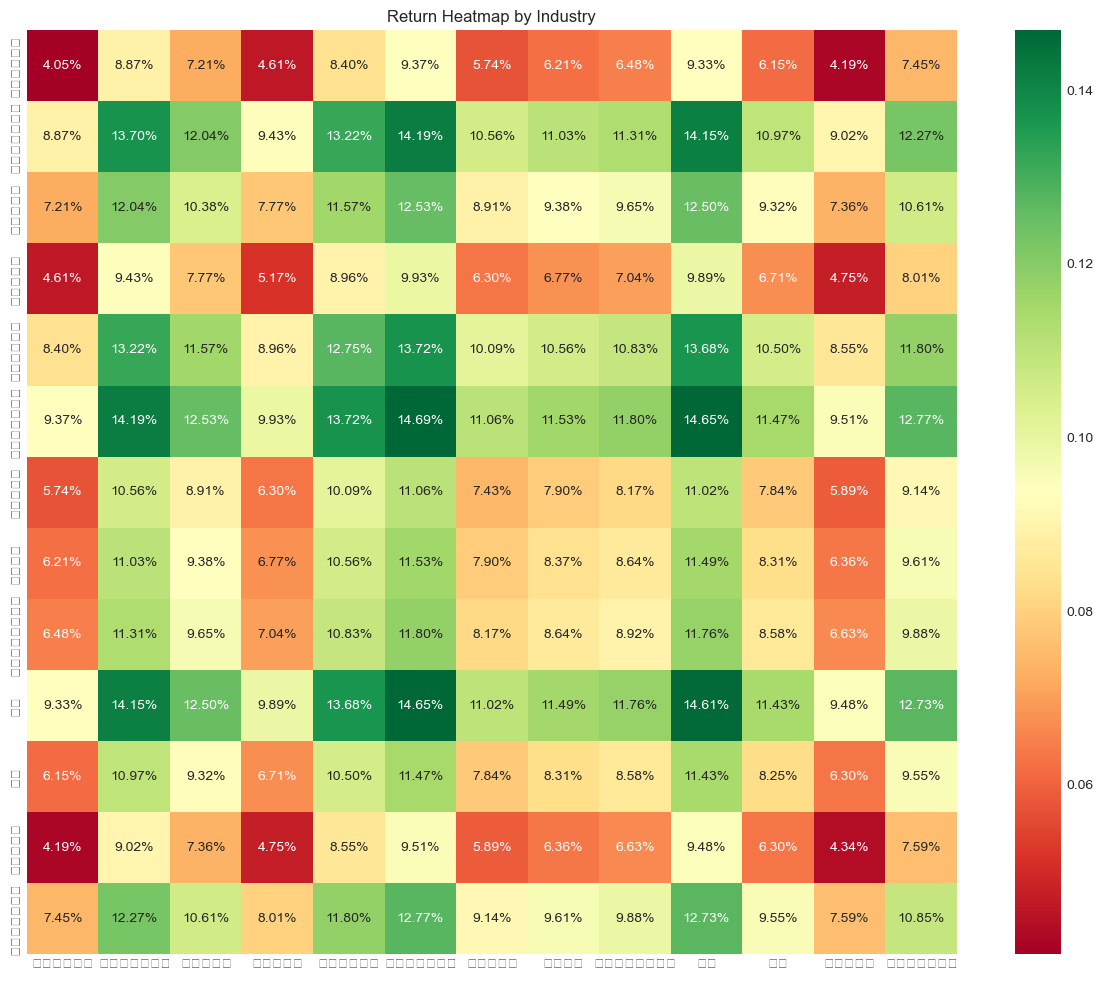

Industry Pair with Highest Return: 産業機械・設備 and 商社
Expected Annual Return: 14.65%
Annualized Volatility: 30.95%
--------------------------------------------------
Industry Pair with Lowest Return: 建設・不動産 and 鉄道・運輸
Expected Annual Return: 4.19%
Annualized Volatility: 22.72%


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

# 各業界の銘柄リストをまとめる
industry_lists = [
    construction_real_estate,
    it_communication,
    food_beverage,
    chemical_materials,
    pharma_bio,
    industrial_machinery,
    metals_mining,
    electrical_equipment,
    auto_transport,
    trading_companies,
    finance,
    railway_transport,
    retail_services
]

# 各業界の名前リスト
industry_names_english = [
    "Construction & Real Estate",
    "Information Technology & Communications",
    "Food & Beverage",
    "Chemicals & Materials",
    "Pharmaceuticals & Biotech",
    "Industrial Machinery & Equipment",
    "Metals & Mining",
    "Electrical Equipment",
    "Automotive & Transport Equipment",
    "Trading Companies",
    "Finance",
    "Railway & Transport",
    "Retail & Services"
]

# 業界の期待リターンを格納するマトリックス
industry_return_matrix = np.zeros((len(industry_lists), len(industry_lists)))

for i in range(len(industry_lists)):
    for j in range(len(industry_lists)):
        data_i = df[industry_lists[i]].pct_change().mean(axis=1) * 12
        data_j = df[industry_lists[j]].pct_change().mean(axis=1) * 12
        
        combined_data = pd.concat([data_i, data_j], axis=1)
        returns_annual = combined_data.mean()
        
        weights = [0.5, 0.5]
        
        returns = np.dot(weights, returns_annual)
        industry_return_matrix[i, j] = returns

# ヒートマップの描画
plt.figure(figsize=(15, 12))
sns.heatmap(industry_return_matrix, annot=True, fmt=".2%", cmap='RdYlGn', xticklabels=industry_names, yticklabels=industry_names)
plt.title("Return Heatmap by Industry")
plt.show()

# 同じ業界同士の組み合わせは除外するため、対角線上の値をNaNに置き換える
np.fill_diagonal(industry_return_matrix, np.nan)

# 最大と最小のリターンの業界の組み合わせとその位置を取得
max_return_idx = np.unravel_index(np.nanargmax(industry_return_matrix), industry_return_matrix.shape)
min_return_idx = np.unravel_index(np.nanargmin(industry_return_matrix), industry_return_matrix.shape)

# それぞれの業界の組み合わせのボラティリティを計算
max_return_volatility = df[industry_lists[max_return_idx[0]]].pct_change().std().mean() * np.sqrt(12)
min_return_volatility = df[industry_lists[min_return_idx[0]]].pct_change().std().mean() * np.sqrt(12)

print(f"Industry Pair with Highest Return: {industry_names[max_return_idx[0]]} and {industry_names[max_return_idx[1]]}")
print(f"Expected Annual Return: {industry_return_matrix[max_return_idx]:.2%}")
print(f"Annualized Volatility: {max_return_volatility:.2%}")
print("-" * 50)
print(f"Industry Pair with Lowest Return: {industry_names[min_return_idx[0]]} and {industry_names[min_return_idx[1]]}")
print(f"Expected Annual Return: {industry_return_matrix[min_return_idx]:.2%}")
print(f"Annualized Volatility: {min_return_volatility:.2%}")

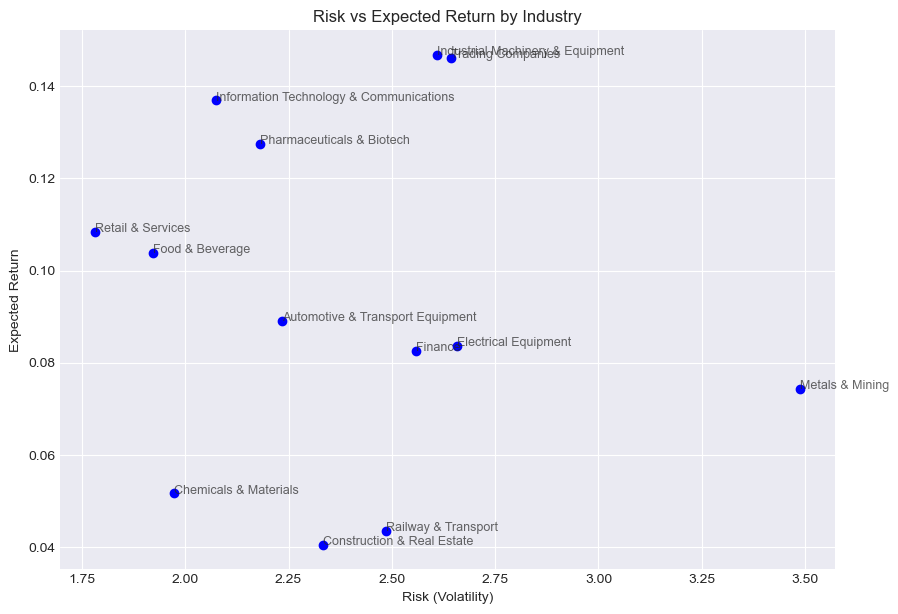

The correlation between risk and expected return is: -0.09


In [40]:
# 各業界の期待リターンとボラティリティを格納するリスト
expected_returns = []
volatilities = []

for industry in industry_lists:
    industry_returns = df[industry].pct_change().mean(axis=1) * 12
    expected_returns.append(industry_returns.mean())
    volatilities.append(industry_returns.std() * np.sqrt(12))

# 散布図の描画
plt.figure(figsize=(10, 7))
plt.scatter(volatilities, expected_returns, color='blue', marker='o')
for i, txt in enumerate(industry_names_english):
    plt.annotate(txt, (volatilities[i], expected_returns[i]), fontsize=9, alpha=0.7)

plt.title('Risk vs Expected Return by Industry')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

# 相関係数の計算
correlation = np.corrcoef(volatilities, expected_returns)[0, 1]
print(f"The correlation between risk and expected return is: {correlation:.2f}")


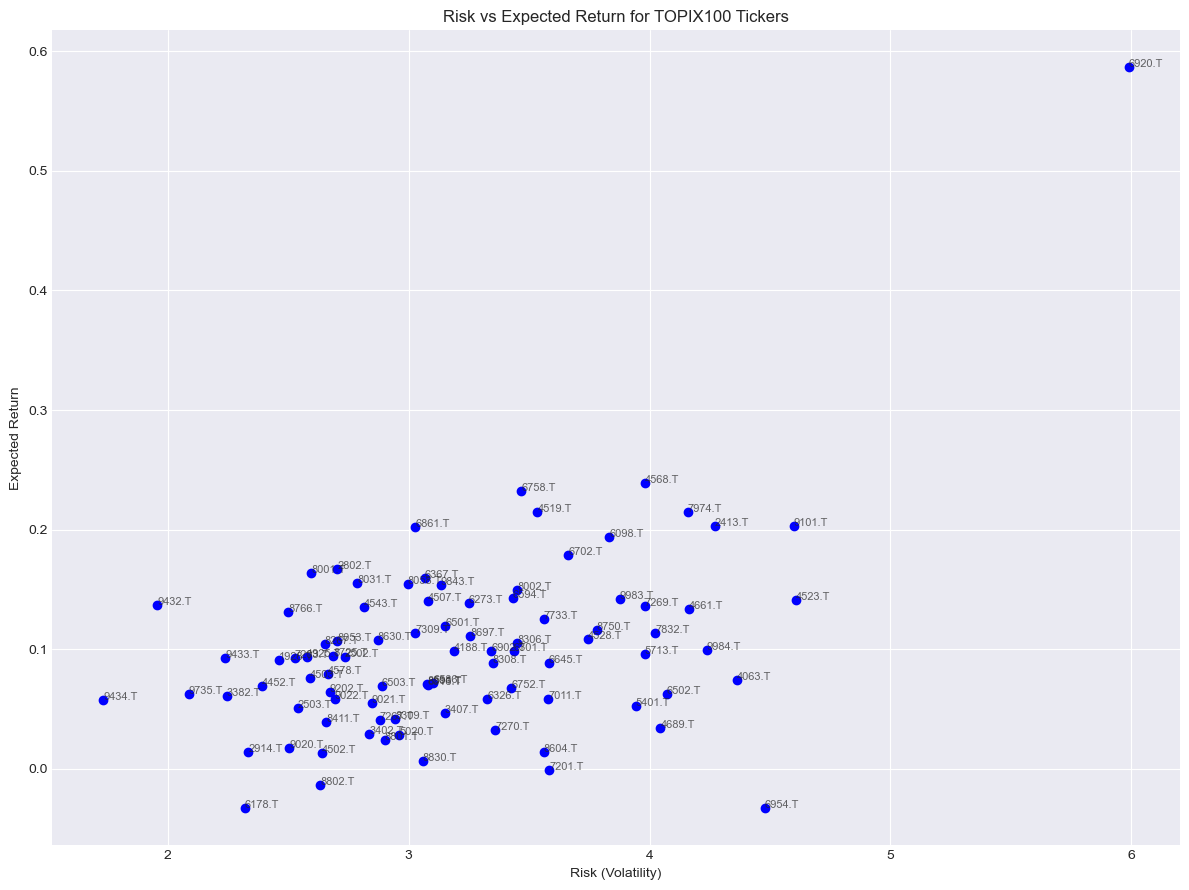

The correlation between risk and expected return for TOPIX100 tickers is: 0.49


In [41]:
# 全ての銘柄の期待リターンとボラティリティを格納するリスト
expected_returns = []
volatilities = []

# すべての銘柄のリストを結合
all_tickers = list(itertools.chain.from_iterable(industry_lists))

for ticker in all_tickers:
    ticker_returns = df[ticker].pct_change() * 12
    expected_returns.append(ticker_returns.mean())
    volatilities.append(ticker_returns.std() * np.sqrt(12))

# 散布図の描画
plt.figure(figsize=(12, 9))
plt.scatter(volatilities, expected_returns, color='blue', marker='o')
for i, txt in enumerate(all_tickers):
    plt.annotate(txt, (volatilities[i], expected_returns[i]), fontsize=8, alpha=0.7)

plt.title('Risk vs Expected Return for TOPIX100 Tickers')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.tight_layout()
plt.show()

# 相関係数の計算
correlation = np.corrcoef(volatilities, expected_returns)[0, 1]
print(f"The correlation between risk and expected return for TOPIX100 tickers is: {correlation:.2f}")
